In [1]:
import numpy as np
from matplotlib import pyplot as plt
import glob,os
from tools.basic.loadsavejson import loadjson
from tools.step.runstep import lj
from scipy.interpolate import griddata

join = os.path.join

In [2]:
parametrize_files = glob.glob(join('output','*.json'))

In [3]:
parametrize_files

['output\\2024-07-05__18-11-51__11043.json',
 'output\\2024-07-06__05-09-56__20206.json',
 'output\\2024-07-06__05-45-18__54415.json',
 'output\\2024-07-06__22-43-34__28982.json',
 'output\\2024-07-06__22-45-31__24393.json']

In [4]:
pt_json = [ loadjson(ipf) for ipf in parametrize_files ]
sim_key = pt_json[-1]["simulation_path"]

In [5]:
params = lj(sim_key)
df = params["results"]["df"].copy()
# add column  
# params["results"]["simulations"]
df["simulations"] = params["results"]["paths"]

post_params = [ lj(lj(sim_key)["dependencies"]["post_path"])
               for sim_key in df["simulations"] ]
sigma_max = [ p["results"]["sigma_max"] for p in post_params ]
ratio     = [ p["results"]["ratio"] for p in post_params ]
sigma    = [ p["results"]["sigma"] for p in post_params ]
df["sigma_max"] = sigma_max
df["ratio"] = ratio
df["sigma"] = sigma
df["denier"] =  [ p["results"]["infl_params"]["denier_per_filament"] 
              for p in post_params ]


In [6]:
post_params[0]["results"].keys()

dict_keys(['measurements', 'frd', 'infl_params', 'simu_params', 'ratio', 'sigma', 'ind_ms', 'sigma_max'])

In [7]:
df

,h,r,simulations,sigma_max,ratio,sigma,denier
0,80.0,3.0,2024-07-06__22-45-32__89058,215.347156,0.485402,159.646549,1037.310011
1,100.0,3.0,2024-07-06__22-48-49__37304,215.425564,0.484850,159.522985,1037.309463
2,80.0,5.0,2024-07-06__22-52-06__98054,215.291577,0.485476,159.629652,1037.326699
3,100.0,5.0,2024-07-06__22-55-23__96493,215.278888,0.485157,159.515435,1037.323291


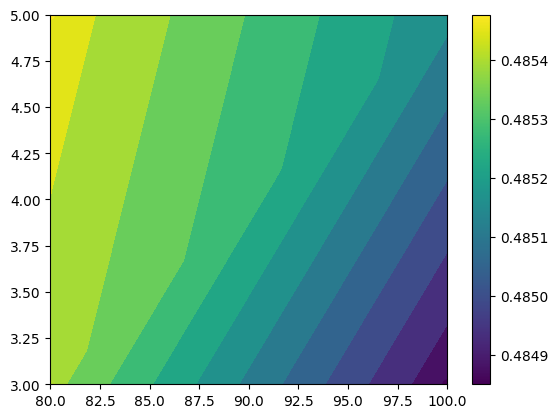

In [8]:
fig = plt.figure()

hspan = np.linspace(df["h"].min(),df["h"].max(),100)
rspan = np.linspace(df["r"].min(),df["r"].max(),100)

h_ms,r_ms = np.meshgrid(hspan,rspan)
# interpolate

ratio_ms = griddata((df["h"],
                     df["r"]),
                     df["ratio"],(h_ms,r_ms),method="linear")

plt.contourf(h_ms,r_ms,ratio_ms,levels=10)
plt.scatter(df["h"],df["r"],c=df["ratio"])
plt.colorbar()
